In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu

In [2]:
!ls *.csv

Epithelial_signatures_version2.csv  Stromal_signatures_version1.csv
Immune_signatures_version1.csv	    TCGA_all_signatures_v2.csv


In [3]:
scores = pd.read_csv("TCGA_all_signatures_v2.csv", index_col=0, header=0)
remove_barcodes = ['TCGA-BL-A13J-01B-04R-A277-07',
                   'TCGA-BL-A13J-01A-11R-A10U-07',
                   'TCGA-BL-A13I-01A-11R-A277-07',
                   'TCGA-BL-A13I-01B-04R-A277-07']
scores = scores.loc[~scores.index.isin(remove_barcodes)]
barcodes = ['-'.join(b.split('-')[:3]) for b in scores.index]
scores.index = barcodes

In [5]:
cols = [
    'Tumor Status',
    'Vital status',
    'Days to last followup',
    'Days until death',
    'Combined days to last followup or death',
    'mRNA cluster'
]
# clinical = pd.read_csv("../blca_tcga_pub_2017_clinical_data.tsv", index_col='Sample ID', header=0, sep="\t")
clinical = pd.read_csv("BLCA_TCGA_supplemental.csv", index_col=0, header=0, sep=",")
clinical = clinical.loc[scores.index, cols]
clinical

,Tumor Status,Vital status,Days to last followup,Days until death,Combined days to last followup or death,mRNA cluster
TCGA-ZF-AA4U,WITH TUMOR,Dead,NaN,262,262,Luminal_papillary
TCGA-G2-AA3C,WITH TUMOR,Dead,NaN,211,211,Basal_squamous
TCGA-FD-A3SM,WITH TUMOR,Dead,NaN,547,547,Luminal_infiltrated
TCGA-XF-A8HG,WITH TUMOR,Dead,NaN,467,467,Luminal_papillary
TCGA-FD-A6TE,TUMOR FREE,Alive,376.0,NaN,376,Luminal_papillary
...,...,...,...,...,...,...
TCGA-UY-A78P,TUMOR FREE,Alive,2380.0,NaN,2380,Basal_squamous
TCGA-ZF-A9RF,TUMOR FREE,Alive,1949.0,NaN,1949,Basal_squamous
TCGA-FD-A3B8,ND,Alive,384.0,NaN,384,Basal_squamous
TCGA-FD-A43P,TUMOR FREE,Alive,832.0,NaN,832,Luminal_infiltrated


In [9]:
consensus = pd.read_csv('Kamoun_consensusMIBC_TCGA.csv', index_col=0, header=0)
consensus.index = ['-'.join(x.split('-')[:3]) for x in consensus.index]
consensus = consensus.loc[scores.index]
consensus

,Dataset,Consensus_class,Gender,Age,Stage,FGFR3_mutation,TP53_mutation,RB1_mutation,Squamous_histo,Neuroendocrine_histo,Micropapillary_histo,Sarcomatoid_histo,Papillary_morpho,CIS_associated
TCGA-ZF-AA4U,TCGA,LumP,M,70,4.0,M,WT,WT,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-G2-AA3C,TCGA,Ba/Sq,M,66,3.0,WT,WT,WT,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-FD-A3SM,TCGA,Stroma-rich,M,70,3.0,M,WT,WT,no,no,no,no,Papillary,NaN
TCGA-XF-A8HG,TCGA,LumP,M,69,3.0,NaN,NaN,NaN,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-FD-A6TE,TCGA,LumP,M,54,3.0,WT,M,M,no,no,no,NaN,Non-Papillary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UY-A78P,TCGA,Ba/Sq,F,78,2.0,NaN,NaN,NaN,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-ZF-A9RF,TCGA,Ba/Sq,M,74,2.0,WT,M,M,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-FD-A3B8,TCGA,Ba/Sq,M,56,2.0,WT,M,WT,no,no,NaN,NaN,Non-Papillary,NaN
TCGA-FD-A43P,TCGA,LumU,M,74,2.0,WT,M,M,no,no,no,no,Non-Papillary,NaN


In [10]:
use_cols = [
'Endothelial_broad_signature_ssGSEA',
'Activated_Bcell_signature_ssGSEA',
'Plasma_Bcell_signature_ssGSEA',
'Treg_signature_ssGSEA',
'Late_Activation_CD8T_signature_ssGSEA',
'Naive_Tcell_signature_ssGSEA',
'Inflam_Macrophage_signature_ssGSEA',
'APC_Macrophage_signature_ssGSEA',
'Dendritic_cell_signature_ssGSEA',
'ACTA2_Fibroblast_signature_ssGSEA',
'FAP_Fibroblast_signature_ssGSEA',
'PDGFRB_Fibroblast_signature_ssGSEA',
'PDPN_Fibroblast_signature_ssGSEA',
'CDH12_CDH18_Epithelial_signature_ssGSEA',
'Proliferating_Epithelial_signature_ssGSEA',
'DSG3_Epithelial_signature_ssGSEA',
'Intermediate_Epithelial_signature_ssGSEA',
'KRT_Epithelial_signature_ssGSEA',
]

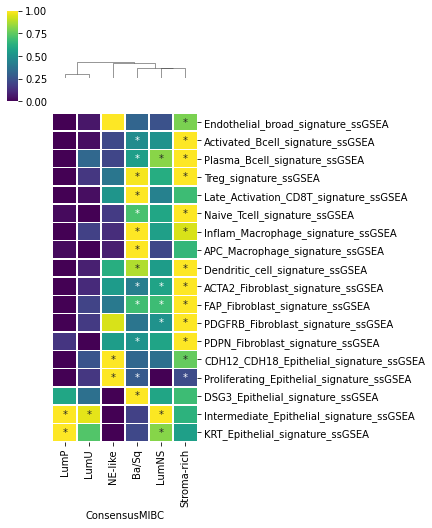

In [32]:
df = scores.loc[:, use_cols].copy()
df['ConsensusMIBC'] = consensus['Consensus_class']
df_mean = df.groupby('ConsensusMIBC').mean().T

df_pval = pd.DataFrame(index=df_mean.index, columns=df_mean.columns, dtype=np.float32)
df_annot = pd.DataFrame(index=df_mean.index, columns=df_mean.columns, dtype=np.float32)

clusters = np.array(df['ConsensusMIBC'].values)
for u in df_mean.columns:
    v = df.loc[clusters==u, :].copy()
    o = df.loc[clusters!=u, :].copy()
    for c in use_cols:
        vc = np.array(v.loc[:,c].values)
        oc = np.array(o.loc[:,c].values)
        res = mannwhitneyu(vc, oc)
        df_pval.loc[c,u] = res[1]
        if (res[1] < 0.05) and (np.mean(vc) > np.mean(oc)):
            df_annot.loc[c,u] = '*'
        else:
            df_annot.loc[c,u] = ''
        
cm = sns.clustermap(df_mean, lw=0.5, 
                    annot = df_annot,
                    fmt = 's',
                    yticklabels=True, 
                    row_cluster=False, col_cluster=True,
                    standard_scale=0,
                    figsize=(3,7),
                    cmap='viridis',
                    dendrogram_ratio=0.05,
                    method='average'
                   )

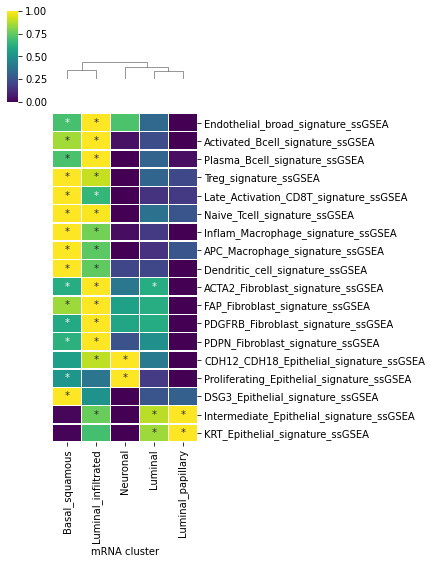

In [31]:
df = scores.loc[:, use_cols].copy()
df['mRNA cluster'] = clinical['mRNA cluster']
df_mean = df.groupby('mRNA cluster').mean().T

df_pval = pd.DataFrame(index=df_mean.index, columns=df_mean.columns, dtype=np.float32)
df_annot = pd.DataFrame(index=df_mean.index, columns=df_mean.columns, dtype=np.float32)

clusters = np.array(df['mRNA cluster'].values)
for u in df_mean.columns:
    v = df.loc[clusters==u, :].copy()
    o = df.loc[clusters!=u, :].copy()
    for c in use_cols:
        vc = np.array(v.loc[:,c].values)
        oc = np.array(o.loc[:,c].values)
        res = mannwhitneyu(vc, oc)
        df_pval.loc[c,u] = res[1]
        if (res[1] < 0.05) and (np.mean(vc) > np.mean(oc)):
            df_annot.loc[c,u] = '*'
        else:
            df_annot.loc[c,u] = ''
        
cm = sns.clustermap(df_mean, lw=0.5, 
                    annot = df_annot,
                    fmt = 's',
                    yticklabels=True, 
                    row_cluster=False, col_cluster=True,
                    standard_scale=0,
                    figsize=(3,7),
                    cmap='viridis',
                    dendrogram_ratio=0.05,
                    method='average'
                   )